<a href="https://colab.research.google.com/github/piumalnipun9/Assignment-1-Intensity-Transformations-and-Neighborhood-Filtering/blob/main/Assignment_1_Intensity_Transformations_and_Neighborhood_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import drive
drive.mount('/content/drive')

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Question 1

In [45]:
# @title Main
img_path = "/content/drive/MyDrive/A1- Images/emma.jpg"

# Read as grayscale
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Couldn't read the image. Check 'img_path' or upload an image.")

# Segment 1
lut = np.zeros(256, dtype=np.uint8)
lut[0:51] = np.arange(0, 51)

# Segment 2
x = np.arange(51, 150)
y = 100 + 1.55 * (x - 50)
lut[51:150] = np.clip(np.rint(y), 0, 255)

# Segment 3
lut[150:256] = np.arange(150, 256)

out = cv.LUT(img, lut)

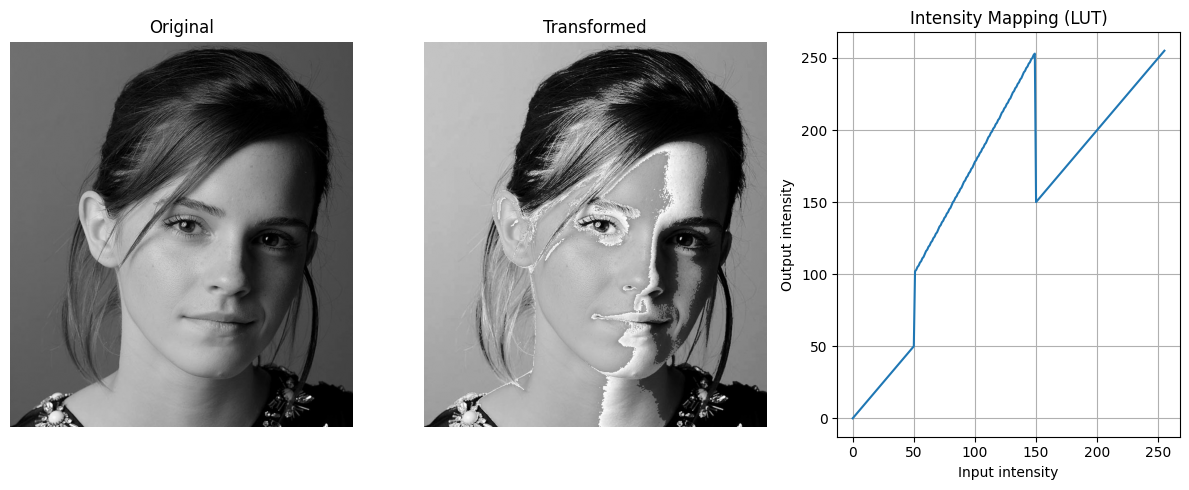

Saved: transformed.png


In [46]:
# @title Plot
#plot images

plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(out, cmap='gray', vmin=0, vmax=255)
plt.title("Transformed")
plt.axis('off')

plt.subplot(1,3,3)
plt.plot(np.arange(256), lut)
plt.title("Intensity Mapping (LUT)")
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save result
cv.imwrite("transformed.png", out)
print("Saved:", "transformed.png")

# Question 2

In [57]:
# @title Main
img_path = "/content/drive/MyDrive/A1- Images/brain_proton_density_slice.png"   # <- change to your file
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
assert img is not None, "Set a valid image path"

# 2) Two cut points (mid-tones ≈ gray matter, highs ≈ white matter)
# thresholds
gray_band_start   = 140   # start of gray-matter band
white_matter_start = 180  # start of white/bright band

# --- White matter: keep x>=white_matter_start, zero below ---
wm = np.zeros(256, dtype=np.uint8)
wm[white_matter_start:] = np.arange(white_matter_start, 256, dtype=np.uint8)

# --- Gray matter: keep gray_band_start <= x <= white_matter_start, zero outside ---
gm = np.zeros(256, dtype=np.uint8)
gm[gray_band_start:white_matter_start+1] = np.arange(gray_band_start, white_matter_start+1, dtype=np.uint8)

# Apply
wm_img = cv.LUT(img, wm)
gm_img = cv.LUT(img, gm)


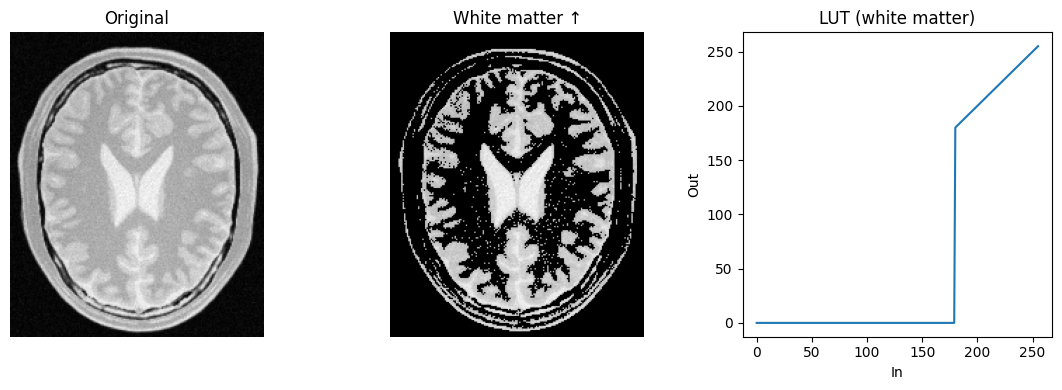

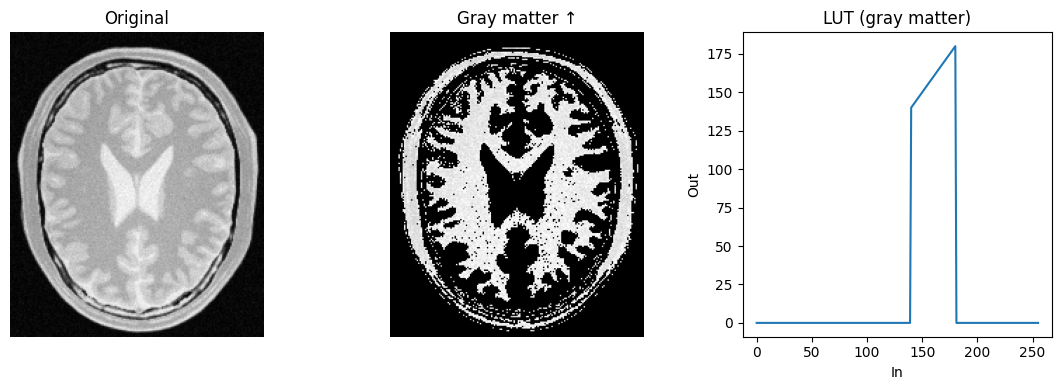

In [58]:
# @title Plot
plt.figure(figsize=(11,4))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray');    plt.title("Original");            plt.axis('off')
plt.subplot(1,3,2); plt.imshow(wm_img, cmap='gray'); plt.title("White matter ↑");      plt.axis('off')
plt.subplot(1,3,3); plt.plot(x, wm);                 plt.title("LUT (white matter)");  plt.xlabel("In"); plt.ylabel("Out"); plt.tight_layout(); plt.show()

plt.figure(figsize=(11,4))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray');    plt.title("Original");           plt.axis('off')
plt.subplot(1,3,2); plt.imshow(gm_img, cmap='gray'); plt.title("Gray matter ↑");      plt.axis('off')
plt.subplot(1,3,3); plt.plot(x, gm);                 plt.title("LUT (gray matter)");  plt.xlabel("In"); plt.ylabel("Out"); plt.tight_layout(); plt.show()


# Question 3

In [59]:
# @title Main
img_path = "/content/drive/MyDrive/A1- Images/highlights_and_shadows.jpg"
img = cv.imread(img_path)

assert img is not None, "Provide a valid image."
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Gamma on L channel (Lab)
gamma_value = 0.78
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
L, a, b = cv.split(lab)

L_f = L.astype(np.float32) / 255.0
L_corr = np.clip((L_f ** gamma_value) * 255.0, 0, 255).astype(np.uint8)

lab_corr = cv.merge([L_corr, a, b])
rgb_corr = cv.cvtColor(lab_corr, cv.COLOR_LAB2RGB)

Gamma used: 0.78


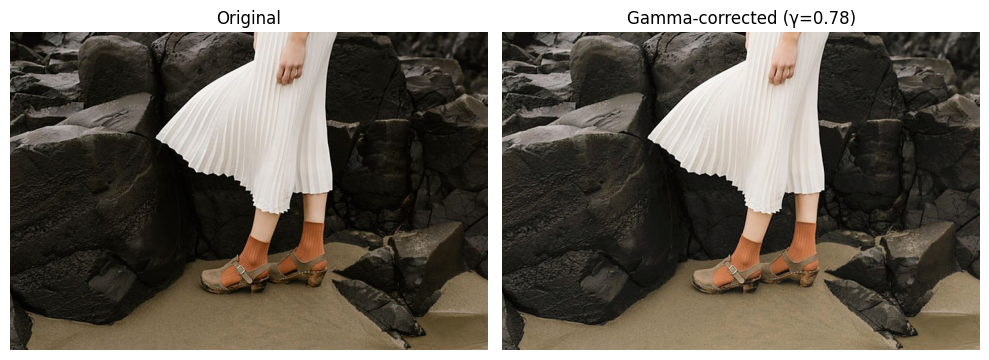

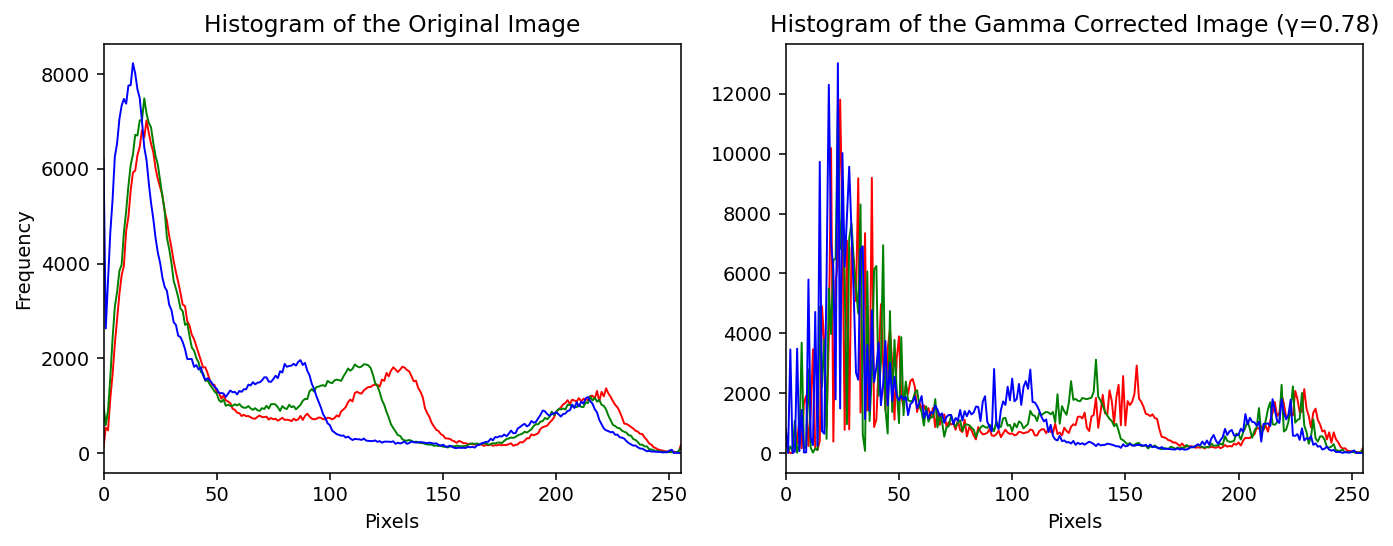

In [60]:
# @title Plot
print("Gamma used:", gamma_value)

# Show images
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(rgb);       plt.title("Original");   plt.axis('off')
plt.subplot(1,2,2); plt.imshow(rgb_corr);  plt.title(f"Gamma-corrected (γ={gamma_value})"); plt.axis('off')
plt.tight_layout(); plt.show()

# Histograms of L (original vs corrected), side-by-side
fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi=140)
# Left: original
for c, col in enumerate(('r','g','b')):
    h, _ = np.histogram(rgb[..., c].ravel(), bins=256, range=(0,256))
    axs[0].plot(x, h, color=col, linewidth=1)
axs[0].set_title("Histogram of the Original Image")
axs[0].set_xlabel("Pixels"); axs[0].set_ylabel("Frequency"); axs[0].set_xlim(0,255)

# Right: gamma-corrected
for c, col in enumerate(('r','g','b')):
    h, _ = np.histogram(rgb_corr[..., c].ravel(), bins=256, range=(0,256))
    axs[1].plot(x, h, color=col, linewidth=1)
axs[1].set_title(f"Histogram of the Gamma Corrected Image (γ={gamma_value})")
axs[1].set_xlabel("Pixels"); axs[1].set_xlim(0,255)

plt.tight_layout(); plt.show()

# Question 4

In [51]:
# @title Main
img_path = "/content/drive/MyDrive/A1- Images/spider.png"   # <- change to your file
bgr = cv.imread(img_path); assert bgr is not None

# 2) Split into HSV planes
hsv = cv.cvtColor(bgr, cv.COLOR_BGR2HSV)
H, S, V = cv.split(hsv)

# 3) Vibrance transform on the Saturation plane
a = 0.55
sigma = 70.0
x = np.arange(256, dtype=np.float32)
T = np.minimum(x + a*128.0*np.exp(-((x-128.0)**2)/(2.0*sigma**2)), 255.0).astype(np.uint8)

S_enh = cv.LUT(S, T)

hsv_enh = cv.merge([H, S_enh, V])
rgb      = cv.cvtColor(bgr, cv.COLOR_BGR2RGB)
rgb_enh  = cv.cvtColor(hsv_enh, cv.COLOR_HSV2RGB)

Used a = 0.55, sigma = 70.0


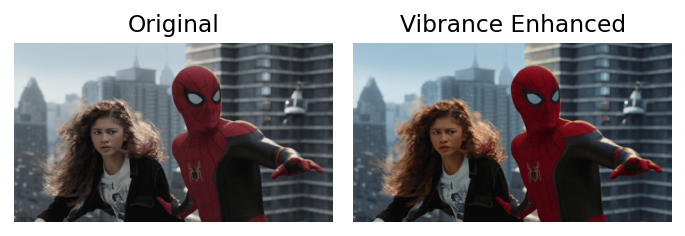

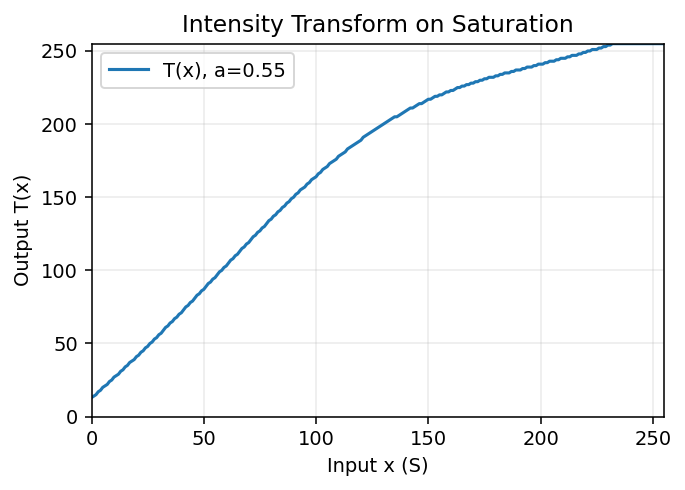

In [52]:
# @title Plot
print(f"Used a = {a}, sigma = {sigma}")

# 5) Show images
plt.figure(figsize=(5,2), dpi=140)
plt.subplot(1,2,1); plt.imshow(rgb);     plt.title("Original");           plt.axis('off')
plt.subplot(1,2,2); plt.imshow(rgb_enh); plt.title("Vibrance Enhanced");  plt.axis('off')
plt.tight_layout(); plt.show()

# 6) Show the intensity transformation curve
plt.figure(figsize=(5,3.6), dpi=140)
plt.plot(x, T, linewidth=1.6, label=f'T(x), a={a}')
plt.xlim(0,255); plt.ylim(0,255)
plt.xlabel("Input x (S)"); plt.ylabel("Output T(x)")
plt.title("Intensity Transform on Saturation")
plt.grid(alpha=0.25); plt.legend(); plt.tight_layout(); plt.show()

# Question 5

In [67]:
# @title Main {"display-mode":"code"}
img_path = "/content/drive/MyDrive/A1- Images/shells.tif"
gray = cv.imread(img_path, cv.IMREAD_UNCHANGED)
assert gray is not None, "Check img_path"

if gray.ndim == 3:
    gray = cv.cvtColor(gray, cv.COLOR_BGR2GRAY)
if gray.dtype != np.uint8:
    gray = cv.normalize(gray, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

def hist_equalize_gray(img8):
    hist = np.bincount(img8.ravel(), minlength=256)
    cdf  = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    lut = np.round((cdf_m - cdf_m.min()) * 255 / (img8.size - cdf_m.min())).astype(np.uint8)
    lut = np.ma.filled(lut, 0)
    eq  = lut[img8]
    hist_eq = np.bincount(eq.ravel(), minlength=256)
    return eq, hist, hist_eq, lut

eq, hist_before, hist_after, lut = hist_equalize_gray(gray)

x = np.arange(256)
cdf_o = hist_before.cumsum()
cdf_e = hist_after.cumsum()

cdf_o_norm = (cdf_o / cdf_o[-1]) * hist_before.max()
cdf_e_norm = (cdf_e / cdf_e[-1]) * hist_after.max()

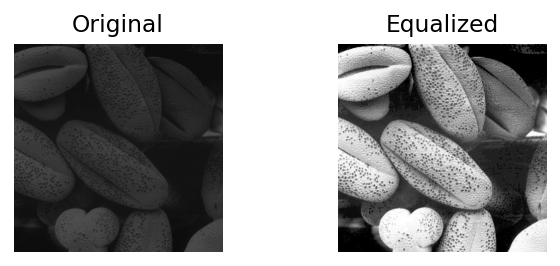

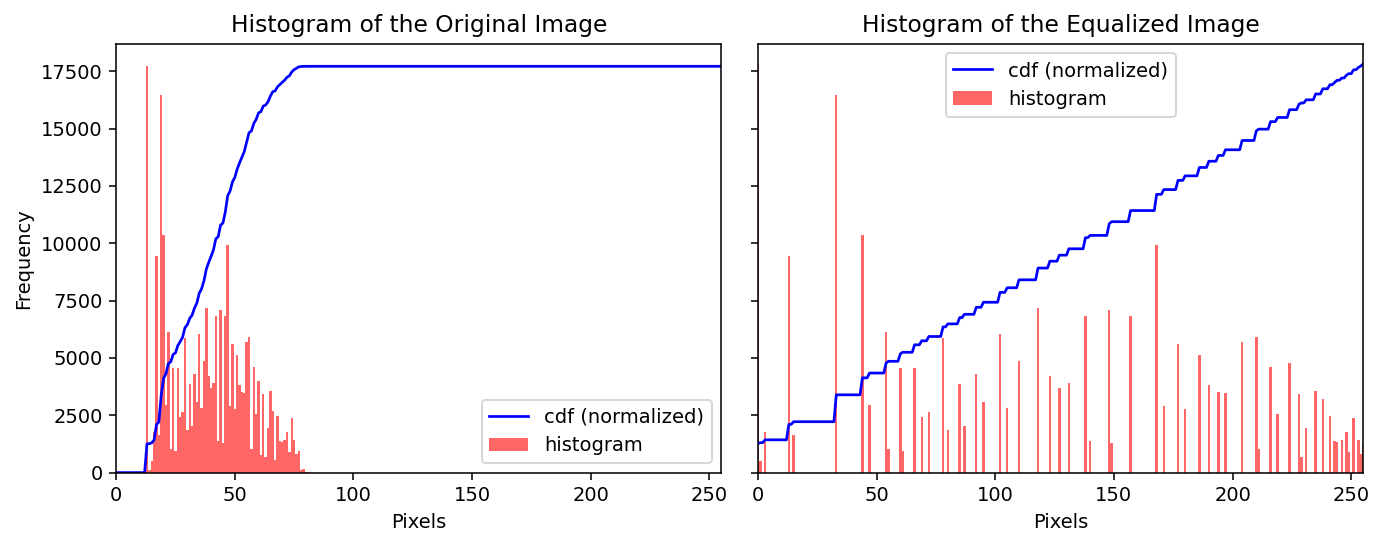

In [68]:
# @title Plot  {"form-width":"1px","display-mode":"code"}
# Show images
plt.figure(figsize=(5,2), dpi=140)
plt.subplot(1,2,1); plt.imshow(gray, cmap='gray', vmin=0, vmax=255); plt.title("Original");  plt.axis('off')
plt.subplot(1,2,2); plt.imshow(eq,   cmap='gray', vmin=0, vmax=255); plt.title("Equalized"); plt.axis('off')
plt.tight_layout(); plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi=140, sharey=True)

axs[0].bar(x, hist_before, color='red', width=1, alpha=0.6, label='histogram')
axs[0].plot(x, cdf_o_norm, color='blue', linewidth=1.4, label='cdf (normalized)')
axs[0].set_title("Histogram of the Original Image")
axs[0].set_xlabel("Pixels"); axs[0].set_ylabel("Frequency"); axs[0].set_xlim(0,255)
axs[0].legend()

axs[1].bar(x, hist_after, color='red', width=1, alpha=0.6, label='histogram')
axs[1].plot(x, cdf_e_norm, color='blue', linewidth=1.4, label='cdf (normalized)')
axs[1].set_title("Histogram of the Equalized Image")
axs[1].set_xlabel("Pixels"); axs[1].set_xlim(0,255)
axs[1].legend()

plt.tight_layout(); plt.show()

# Question 6

In [72]:
# @title Main
img_path = "/content/drive/MyDrive/A1- Images/jeniffer.jpg"
bgr = cv.imread(img_path); assert bgr is not None
hsv = cv.cvtColor(bgr, cv.COLOR_BGR2HSV)
H, S, V = cv.split(hsv)

# (b) Make a foreground mask (Otsu on Saturation; swap to V if better)
thresh_val, _ = cv.threshold(S, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
mask_fg = (S > thresh_val).astype(np.uint8) * 255

# (c) Keep only foreground on V (for histogram)
V_fg = cv.bitwise_and(V, V, mask=mask_fg)
vals_before = V[mask_fg>0]

# (d) Cumulative sum (CDF) of the foreground histogram
hist_before = np.bincount(vals_before, minlength=256)
cdf_before  = hist_before.cumsum()

# (e) Histogram-equalize FOREGROUND ONLY (custom LUT)
N = vals_before.size
cdf_m = np.ma.masked_equal(cdf_before, 0)
lut_fg = np.round((cdf_m - cdf_m.min()) * 255 / (N - cdf_m.min())).astype(np.uint8)
lut_fg = np.ma.filled(lut_fg, 0)

V_eq = V.copy()
V_eq[mask_fg>0] = lut_fg[V[mask_fg>0]]

# (f) Recombine background + equalized foreground
hsv_eq = cv.merge([H, S, V_eq])
bgr_eq = cv.cvtColor(hsv_eq, cv.COLOR_HSV2BGR)
rgb     = cv.cvtColor(bgr,    cv.COLOR_BGR2RGB)
rgb_eq  = cv.cvtColor(bgr_eq, cv.COLOR_BGR2RGB)

vals_after  = V_eq[mask_fg>0]
hist_after  = np.bincount(vals_after, minlength=256)
cdf_after   = hist_after.cumsum()

x = np.arange(256)
cdf_before_norm = (cdf_before / cdf_before[-1]) * hist_before.max()
cdf_after_norm  = (cdf_after  / cdf_after[-1])  * hist_after.max()

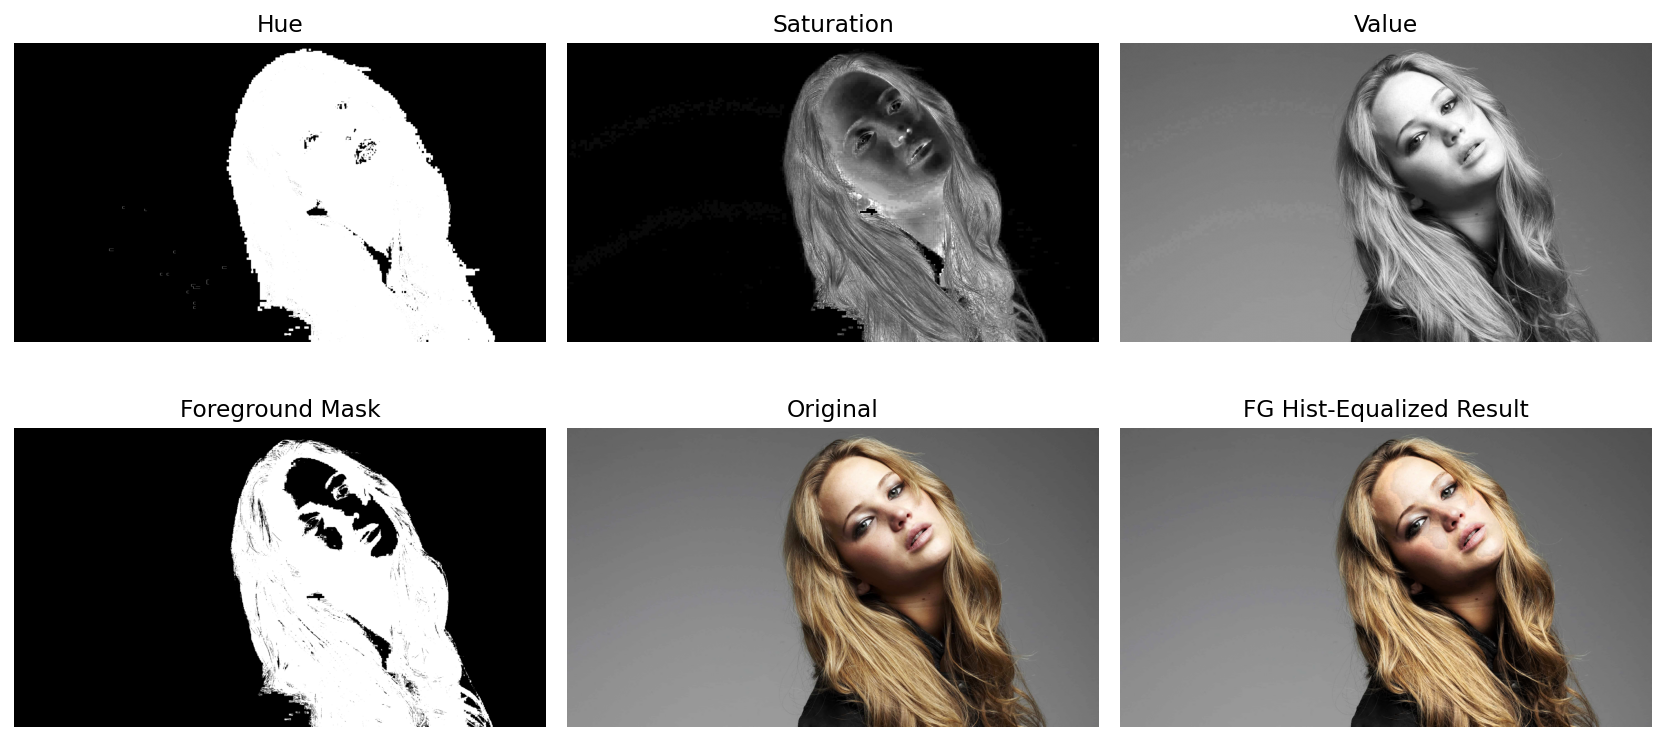

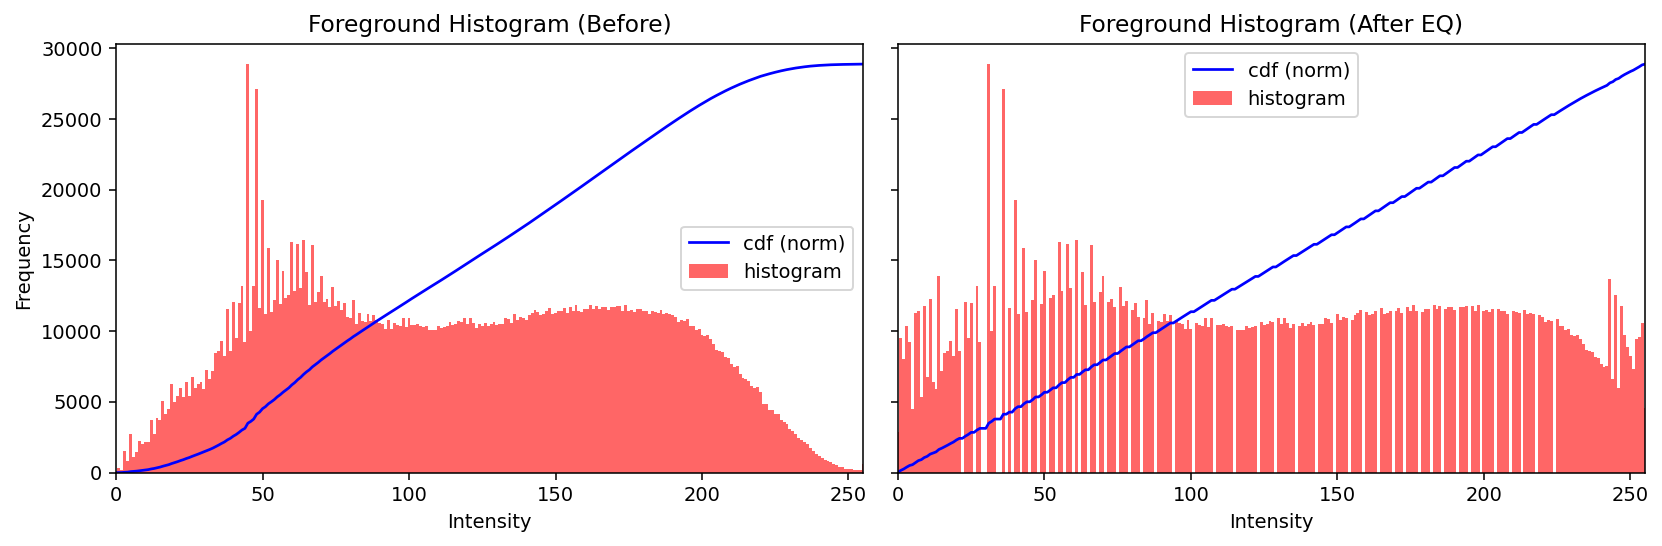

In [73]:
# @title Plot

# Show H, S, V, mask, original, result

plt.figure(figsize=(12,6), dpi=140)
plt.subplot(2,3,1); plt.imshow((H*255/179).astype(np.uint8), cmap='gray'); plt.title("Hue"); plt.axis('off')
plt.subplot(2,3,2); plt.imshow(S, cmap='gray'); plt.title("Saturation"); plt.axis('off')
plt.subplot(2,3,3); plt.imshow(V, cmap='gray'); plt.title("Value"); plt.axis('off')
plt.subplot(2,3,4); plt.imshow(mask_fg, cmap='gray'); plt.title("Foreground Mask"); plt.axis('off')
plt.subplot(2,3,5); plt.imshow(rgb);    plt.title("Original"); plt.axis('off')
plt.subplot(2,3,6); plt.imshow(rgb_eq); plt.title("FG Hist-Equalized Result"); plt.axis('off')
plt.tight_layout(); plt.show()

fig, axs = plt.subplots(1,2, figsize=(12,4), dpi=140, sharey=True)
axs[0].bar(x, hist_before, width=1, color='red', alpha=0.6, label='histogram')
axs[0].plot(x, cdf_before_norm, color='blue', lw=1.4, label='cdf (norm)')
axs[0].set_title("Foreground Histogram (Before)"); axs[0].set_xlabel("Intensity"); axs[0].set_ylabel("Frequency"); axs[0].set_xlim(0,255); axs[0].legend()

axs[1].bar(x, hist_after, width=1, color='red', alpha=0.6, label='histogram')
axs[1].plot(x, cdf_after_norm,  color='blue', lw=1.4, label='cdf (norm)')
axs[1].set_title("Foreground Histogram (After EQ)"); axs[1].set_xlabel("Intensity"); axs[1].set_xlim(0,255); axs[1].legend()

plt.tight_layout(); plt.show()


# Question 7

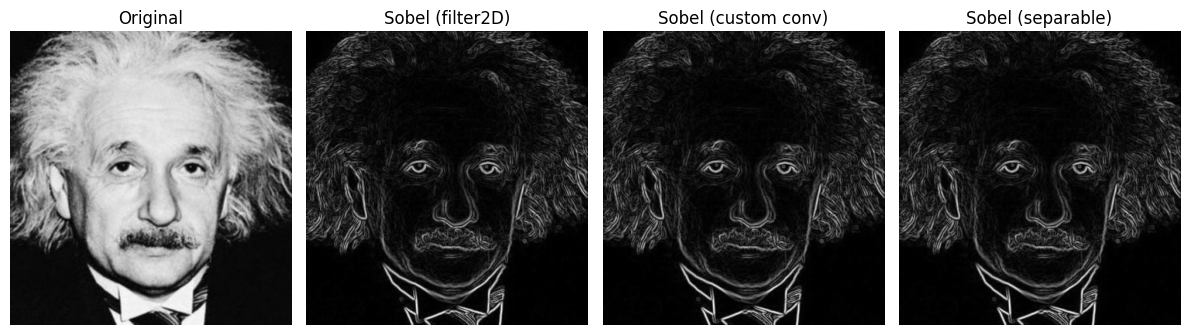

In [80]:
img_path = "/content/drive/MyDrive/A1- Images/einstein.png"
gray_img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
gray_img = gray_img.astype(np.float32)

sobel_kx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]], np.float32)
sobel_ky = sobel_kx.T


grad_x_cv = cv.filter2D(gray_img, -1, sobel_kx, borderType=cv.BORDER_REFLECT101)
grad_y_cv = cv.filter2D(gray_img, -1, sobel_ky, borderType=cv.BORDER_REFLECT101)
magnitude_cv = np.hypot(grad_x_cv, grad_y_cv)

def conv2d_same(img, kern):
    kh, kw = kern.shape
    ky, kx = kh//2, kw//2
    k = np.flipud(np.fliplr(kern))
    pad = cv.copyMakeBorder(img, ky, ky, kx, kx, cv.BORDER_REFLECT101)
    out = np.zeros_like(img, dtype=np.float32) # Initialize out with zeros
    for y in range(out.shape[0]):
        for x in range(out.shape[1]):
            out[y, x] = np.sum(pad[y:y+kh, x:x+kw] * k) # Corrected convolution operation
    return out

grad_x_my = conv2d_same(gray_img, sobel_kx)
grad_y_my = conv2d_same(gray_img, sobel_ky)
magnitude_my = np.hypot(grad_x_my, grad_y_my)


smooth_kernel = np.array([[1],[2],[1]], np.float32)
derivx_kernel = np.array([[1,0,-1]], np.float32)
derivy_kernel = derivx_kernel.T

grad_x_sep = cv.filter2D(gray_img, -1, derivx_kernel, borderType=cv.BORDER_REFLECT101)
grad_x_sep = cv.filter2D(grad_x_sep, -1, smooth_kernel,  borderType=cv.BORDER_REFLECT101)

grad_y_sep = cv.filter2D(gray_img, -1, derivy_kernel, borderType=cv.BORDER_REFLECT101)
grad_y_sep = cv.filter2D(grad_y_sep, -1, smooth_kernel.T, borderType=cv.BORDER_REFLECT101)
magnitude_sep = np.hypot(grad_y_sep, grad_x_sep)


def show(title, im):
    plt.imshow(np.clip(im, 0, None)/np.max(im+1e-6), cmap='gray'); plt.title(title); plt.axis('off')

plt.figure(figsize=(18,4)) # Adjusted figure size for a single row
plt.subplot(1,6,1);  show("Original", gray_img)
plt.subplot(1,6,2);  show("Gx (filter2D)", grad_x_cv)
plt.subplot(1,6,3);  show("Gy (filter2D)", grad_y_cv)
plt.subplot(1,6,4);  show("|G| (filter2D)", magnitude_cv)
plt.subplot(1,6,5);  show("|G| (own)", magnitude_my) # Only showing magnitudes for comparison
plt.subplot(1,6,6); show("|G| (separable)", magnitude_sep) # Only showing magnitudes for comparison
plt.tight_layout(); plt.show()

# Differences to verify equivalence (should be near-zero)
plt.figure(figsize=(9,3))
plt.subplot(1,3,1); show("|Gx_a - Gx_b|", np.abs(grad_x_cv-grad_x_my))
plt.subplot(1,3,2); show("|Gx_a - Gx_c|", np.abs(grad_x_cv-grad_x_sep))
plt.subplot(1,3,3); show("|Gy_a - Gy_c|", np.abs(grad_y_cv-grad_y_sep))
plt.tight_layout(); plt.show()

# Question 8

SSD  nearest: 182795248.0
nSSD nearest: 0.0012201186509462174
SSD  bilinear: 127156768.0
nSSD bilinear: 0.0008487438591994532


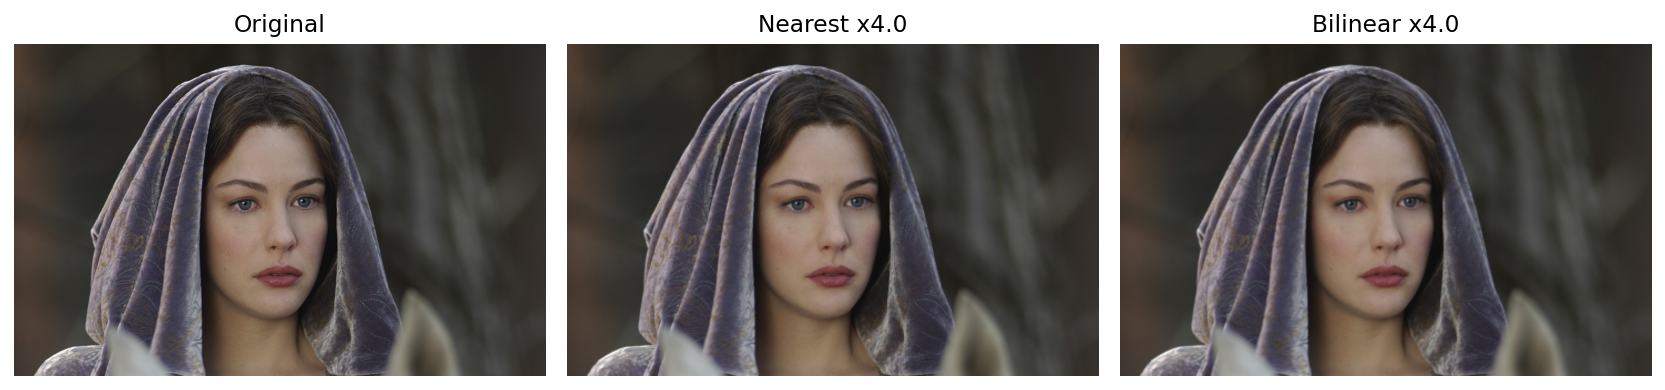

In [84]:
def zoom_color(img: np.ndarray, s: float, method: str = "nearest") -> np.ndarray:
    assert img.ndim == 3 and img.shape[2] == 3, "Expect color image (H,W,3)"
    assert 0 < s <= 10, "s in (0,10]"
    h, w, _ = img.shape
    H, W = int(round(h*s)), int(round(w*s))

    # map output pixel centers to source coords (half-pixel)
    yy = (np.arange(H) + 0.5) / s - 0.5
    xx = (np.arange(W) + 0.5) / s - 0.5
    yy = np.clip(yy, 0, h-1)
    xx = np.clip(xx, 0, w-1)

    if method == "nearest":
        iy = np.round(yy).astype(np.int32)
        ix = np.round(xx).astype(np.int32)
        return img[iy[:,None], ix[None,:], :]

    if method == "bilinear":
        src = img.astype(np.float32)

        y0 = np.floor(yy).astype(np.int32); y1 = np.clip(y0+1, 0, h-1)
        x0 = np.floor(xx).astype(np.int32); x1 = np.clip(x0+1, 0, w-1)
        wy = yy - y0;                       wx = xx - x0

        Ia = src[y0[:,None], x0[None,:], :]   # (H,W,3)
        Ib = src[y0[:,None], x1[None,:], :]
        Ic = src[y1[:,None], x0[None,:], :]
        Id = src[y1[:,None], x1[None,:], :]

        # make weights (H,W,1) so they broadcast across the 3 channels
        wa = ((1-wy)[:,None]*(1-wx)[None,:])[...,None]
        wb = ((1-wy)[:,None]*     wx[None,:])[...,None]
        wc = (     wy [:,None]*(1-wx)[None,:])[...,None]
        wd = (     wy [:,None]*     wx[None,:])[...,None]

        out = Ia*wa + Ib*wb + Ic*wc + Id*wd
        return np.clip(out, 0, 255).astype(np.uint8)

    raise ValueError("method must be 'nearest' or 'bilinear'")

def ssd(a, b):
    d = a.astype(np.float32) - b.astype(np.float32)
    return float(np.sum(d*d))

def nssd(a, b):
    return ssd(a,b) / (a.shape[0]*a.shape[1]*255.0*255.0)

# ==== example ====
small = cv.imread("/content/drive/MyDrive/A1- Images/Q8 images/im02small.png")
orig  = cv.imread("/content/drive/MyDrive/A1- Images/Q8 images/im02.png")
scale = 4.0

up_nn = zoom_color(small, scale, "nearest")
up_bl = zoom_color(small, scale, "bilinear")

H = min(orig.shape[0], up_nn.shape[0], up_bl.shape[0])
W = min(orig.shape[1], up_nn.shape[1], up_bl.shape[1])
orig_c, up_nn_c, up_bl_c = orig[:H,:W], up_nn[:H,:W], up_bl[:H,:W]

print("SSD  nearest:", ssd(up_nn_c, orig_c))
print("nSSD nearest:", nssd(up_nn_c, orig_c))
print("SSD  bilinear:", ssd(up_bl_c, orig_c))
print("nSSD bilinear:", nssd(up_bl_c, orig_c))

# visualize
fig, ax = plt.subplots(1,3, figsize=(12,4), dpi=140)
ax[0].imshow(cv.cvtColor(orig_c, cv.COLOR_BGR2RGB)); ax[0].set_title("Original"); ax[0].axis('off')
ax[1].imshow(cv.cvtColor(up_nn_c, cv.COLOR_BGR2RGB)); ax[1].set_title(f"Nearest x{scale}"); ax[1].axis('off')
ax[2].imshow(cv.cvtColor(up_bl_c, cv.COLOR_BGR2RGB)); ax[2].set_title(f"Bilinear x{scale}"); ax[2].axis('off')
plt.tight_layout(); plt.show()

# Question 9

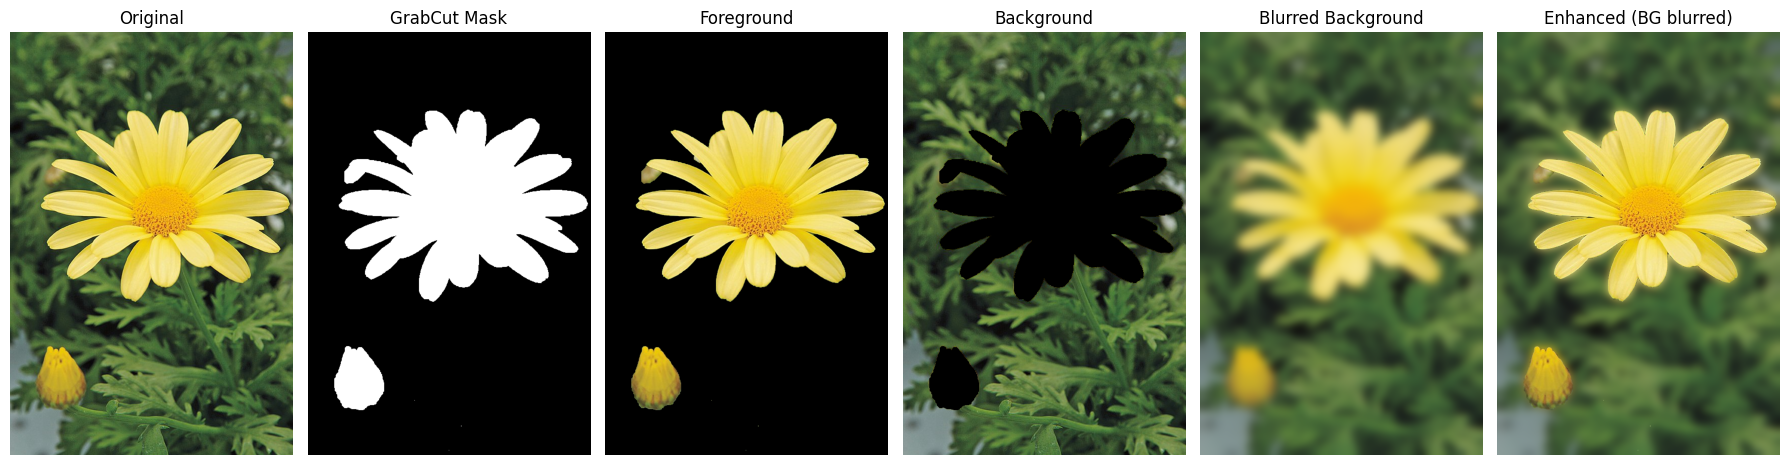

In [93]:
img_path = "/content/drive/MyDrive/A1- Images/daisy.jpg"
bgr_img = cv.imread(img_path); assert bgr_img is not None
rgb_img = cv.cvtColor(bgr_img, cv.COLOR_BGR2RGB)
h, w = rgb_img.shape[:2]

# (a) GrabCut segmentation (rect init; tweak margin if needed) ---
mask = np.zeros((h, w), np.uint8)
bgModel = np.zeros((1, 65), np.float64)
fgModel = np.zeros((1, 65), np.float64)

rect = (1, 1, w-2, h-2)
cv.grabCut(bgr_img, mask, rect, bgModel, fgModel, 5, cv.GC_INIT_WITH_RECT)

# final binary mask (FG = 255, BG = 0)
mask_bin = np.where((mask == cv.GC_FGD) | (mask == cv.GC_PR_FGD), 255, 0).astype(np.uint8)

# foreground & background images for display
foreground = cv.bitwise_and(rgb_img, rgb_img, mask=mask_bin)
background = cv.bitwise_and(rgb_img, rgb_img, mask=cv.bitwise_not(mask_bin))

# Blur the original full image, not the masked background
blurred_img = cv.GaussianBlur(rgb_img, (0, 0), sigmaX=9, sigmaY=9)
blurred_background=cv.bitwise_and(blurred_img, blurred_img, mask=cv.bitwise_not(mask_bin))

enhanced_img = foreground + blurred_background

plt.figure(figsize=(18, 5)) # Adjusted figure size for a single row

plt.subplot(1,6,1); plt.imshow(rgb_img);         plt.title("Original");        plt.axis('off')
plt.subplot(1,6,2); plt.imshow(mask_bin, cmap='gray'); plt.title("GrabCut Mask"); plt.axis('off')
plt.subplot(1,6,3); plt.imshow(foreground);          plt.title("Foreground");      plt.axis('off')
plt.subplot(1,6,4); plt.imshow(background);          plt.title("Background");      plt.axis('off')
plt.subplot(1,6,5); plt.imshow(blurred_img);     plt.title("Blurred Background"); plt.axis('off')
plt.subplot(1,6,6); plt.imshow(enhanced_img);    plt.title("Enhanced (BG blurred)"); plt.axis('off')

plt.tight_layout(); plt.show()

If you blur after masking the foreground to black (0), the blur kernel mixes those zeros into nearby background pixels, pulling them darker and creating a “dark halo.” The fix is what we did above: blur the original image (no zeros), then composite with the foreground using the mask, ideally with a feathered mask to get a smooth transition.